# Analisa Lulusan SMK, apakah Mereka Bekerja, Melanjutkan Kuliah, dan Menganggur

In [17]:
import numpy as np
import pandas as pd

In [18]:
from encodings.aliases import aliases

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("jmd-data_siswa_smk_new.csv", encoding=encoding)
        print('successful', encoding)
    except:
        pass
df.head()

successful cp862
successful cp863
successful cp932
successful cp857
successful mac_greek
successful hz
successful iso8859_16
successful iso2022_jp_3
successful iso8859_2
successful cp1125
successful cp437
successful cp861
successful cp850
successful mbcs
successful latin_1
successful cp1252
successful iso8859_4
successful tis_620
successful mac_roman
successful ptcp154
successful big5hkscs
successful mac_iceland
successful cp1250
successful cp858
successful shift_jisx0213
successful iso8859_8
successful gbk
successful cp865
successful iso8859_9
successful cp852
successful iso8859_13
successful iso8859_14
successful iso8859_5
successful cp1256
successful cp1251
successful johab
successful cp950
successful iso2022_jp_ext
successful cp775
successful cp866
successful iso8859_15
successful iso8859_10
successful cp1258
successful iso8859_6
successful iso2022_jp_2
successful euc_kr
successful gb2312
successful euc_jis_2004
successful big5
successful iso8859_7
successful iso2022_kr
successful 

,Unnamed: 0.1,Unnamed: 0,nama,tahun,status
0,0,0.0,Cayadi Wasita,2018,Kuliah
1,1,1.0,Tasnim Adriansyah,2018,Kuliah
2,2,2.0,H. Aditya Nugroho,2020,Menganggur
3,3,3.0,Jarwa Latupono,2016,Kuliah
4,4,4.0,Puspa Kuswandari,2017,Bekerja


In [19]:
## hapus baris yang tidak digunakan
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
df.head()

,nama,tahun,status
0,Cayadi Wasita,2018,Kuliah
1,Tasnim Adriansyah,2018,Kuliah
2,H. Aditya Nugroho,2020,Menganggur
3,Jarwa Latupono,2016,Kuliah
4,Puspa Kuswandari,2017,Bekerja


In [20]:
# hitung total data yg null
df.isnull().sum()

nama      0
tahun     0
status    0
dtype: int64

In [21]:
df_new = df.copy()
df_new = df_new.dropna()
df_new.isna().sum()
df_new.shape

(6500, 3)

In [22]:
df_group = df_new.sort_values("tahun").groupby("tahun")
unique_year = df_group["tahun"].unique()

data_bekerja = []
data_kuliah = []
data_menganggur = []
data_tahun = []

for item in unique_year:
  i = 0
  get_array_year = item[i]
  data_tahun.append(str(get_array_year))
  get_data_year = df_group.get_group(get_array_year)
  data_bekerja.append(get_data_year.groupby("status").get_group("Bekerja")['nama'].count())
  data_kuliah.append(get_data_year.groupby('status').get_group("Kuliah")['nama'].count())
  data_menganggur.append(get_data_year.groupby('status').get_group('Menganggur')['nama'].count())
  i += 1

print(data_bekerja, data_kuliah, data_menganggur)

data_value = {
    'tahun' : data_tahun,
    'bekerja' : data_bekerja,
    'kuliah' : data_kuliah,
    'menganggur' : data_menganggur
}

df_graph = pd.DataFrame(data_value)


[407, 402, 447, 446, 442] [441, 424, 426, 452, 447] [416, 444, 458, 422, 426]


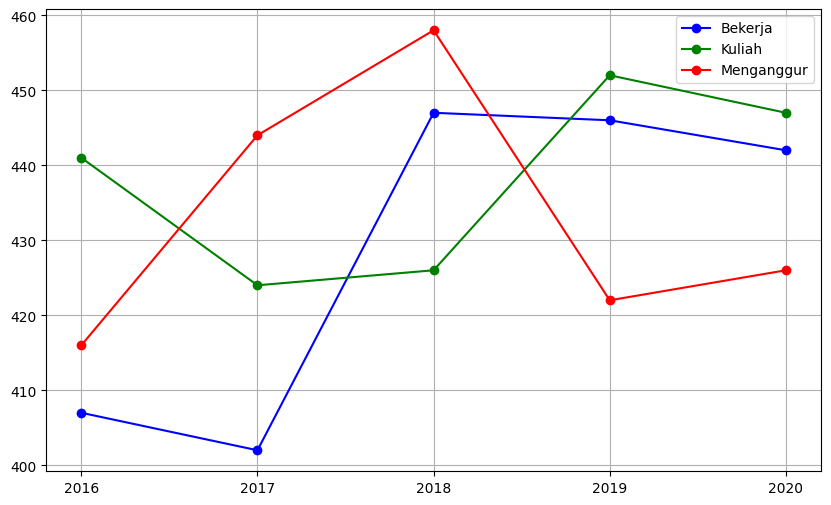

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_graph['tahun'], df_graph['bekerja'], marker='o', label='Bekerja', color='b')
plt.plot(df_graph['tahun'], df_graph['kuliah'], marker='o', label='Kuliah', color='g')
plt.plot(df_graph['tahun'], df_graph['menganggur'], marker='o', label='Menganggur', color='r')

plt.legend()

plt.grid(True)

plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

new_df = pd.DataFrame(data_value)
new_df = new_df.astype(float)
new_df = new_df.astype(int)

new_df.dtypes


tahun         int32
bekerja       int32
kuliah        int32
menganggur    int32
dtype: object

In [25]:
new_df.head(10)

,tahun,bekerja,kuliah,menganggur
0,2016,407,441,416
1,2017,402,424,444
2,2018,447,426,458
3,2019,446,452,422
4,2020,442,447,426


In [26]:
tahun_prediksi = 2021
df_prediksi = pd.DataFrame({'tahun' : [tahun_prediksi]})

X = new_df[['tahun']]
y_bekerja = new_df['bekerja']
y_kuliah = new_df['kuliah']
y_menganggur = new_df['menganggur']

X_train, X_test, y_bekerja_train, y_bekerja_test = train_test_split(X,y_bekerja, test_size=0.2, random_state=42)
X_train, X_test, y_kuliah_train, y_kuliah_test = train_test_split(X,y_kuliah, test_size=0.2, random_state=42)
X_train, X_test, y_menganggur_train, y_menganggur_test = train_test_split(X,y_menganggur, test_size=0.2, random_state=42)



In [27]:
model_bekerja = SVR(kernel='linear', C=1.0)
model_kuliah = SVR(kernel='linear', C=1.0)
model_menganggur = SVR(kernel='linear', C=1.0)

model_bekerja.fit(X_train, y_bekerja_train)
model_kuliah.fit(X_train, y_kuliah_train)
model_menganggur.fit(X_train, y_menganggur_train)

SVR(kernel='linear')

In [28]:
prediksi_tahundepan_bekerja = model_bekerja.predict(np.array([[tahun_prediksi]]))
prediksi_tahundepan_kuliah = model_kuliah.predict(np.array([[tahun_prediksi]]))
prediksi_tahundepan_menganggur = model_menganggur.predict(np.array([[tahun_prediksi]]))

c:\Users\jmd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\jmd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\jmd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [29]:
df_prediksi['bekerja'] = prediksi_tahundepan_bekerja
df_prediksi['kuliah'] = prediksi_tahundepan_kuliah
df_prediksi['menganggur'] = prediksi_tahundepan_menganggur

new_df = pd.concat([new_df, df_prediksi], ignore_index=True)

In [30]:
y_pred_bekerja_test = model_bekerja.predict(X_test)
mse_bekerja = mean_squared_error(y_bekerja_test, y_pred_bekerja_test)
print(f"Mean Squared Error For 'bekerja' on Test Set: {mse_bekerja}")

y_pred_kuliah_test = model_kuliah.predict(X_test)
mse_kuliah = mean_squared_error(y_kuliah_test, y_pred_kuliah_test)
print(f"Mean Squared Error For 'kuliah' on Test Set: {mse_kuliah}")

y_pred_menganggur_test = model_menganggur.predict(X_test)
mse_menganggur = mean_squared_error(y_menganggur_test, y_pred_menganggur_test)
print(f"Mean Squared Error For 'menganggur' on Test Set: {mse_menganggur}")

Mean Squared Error For 'bekerja' on Test Set: 1560.25
Mean Squared Error For 'kuliah' on Test Set: 344.10250001036565
Mean Squared Error For 'menganggur' on Test Set: 647.7024999857787


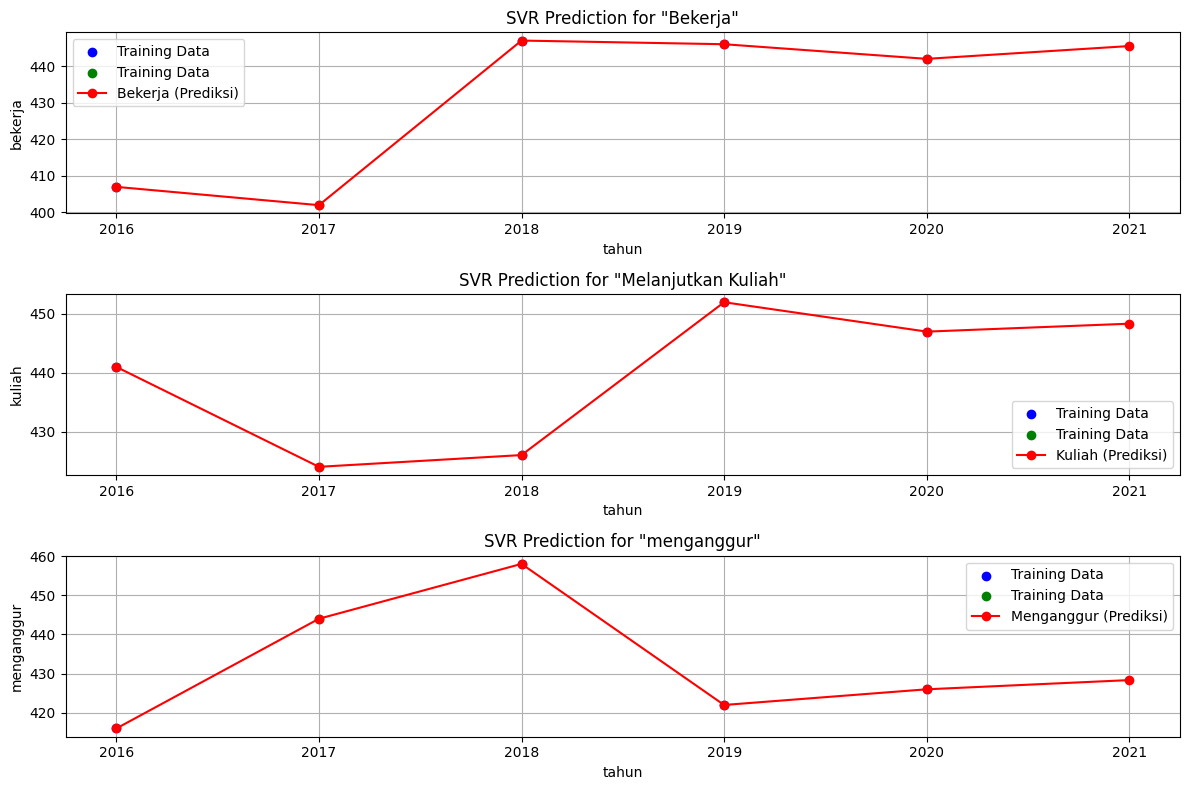

In [31]:
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.scatter(X_train, y_bekerja_train, color='blue', label="Training Data")
plt.scatter(X_test, y_bekerja_test, color='green', label="Training Data")
plt.plot(new_df['tahun'], new_df['bekerja'], marker='o', label="Bekerja (Prediksi)", color='red')
plt.xlabel('tahun')
plt.ylabel('bekerja')
plt.title('SVR Prediction for "Bekerja"')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.scatter(X_train, y_kuliah_train, color='blue', label="Training Data")
plt.scatter(X_test, y_kuliah_test, color='green', label="Training Data")
plt.plot(new_df['tahun'], new_df['kuliah'], marker='o', label="Kuliah (Prediksi)", color='red')
plt.xlabel('tahun')
plt.ylabel('kuliah')
plt.title('SVR Prediction for "Melanjutkan Kuliah"')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.scatter(X_train, y_menganggur_train, color='blue', label="Training Data")
plt.scatter(X_test, y_menganggur_test, color='green', label="Training Data")
plt.plot(new_df['tahun'], new_df['menganggur'], marker='o', label="Menganggur (Prediksi)", color='red')
plt.xlabel('tahun')
plt.ylabel('menganggur')
plt.title('SVR Prediction for "menganggur"')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

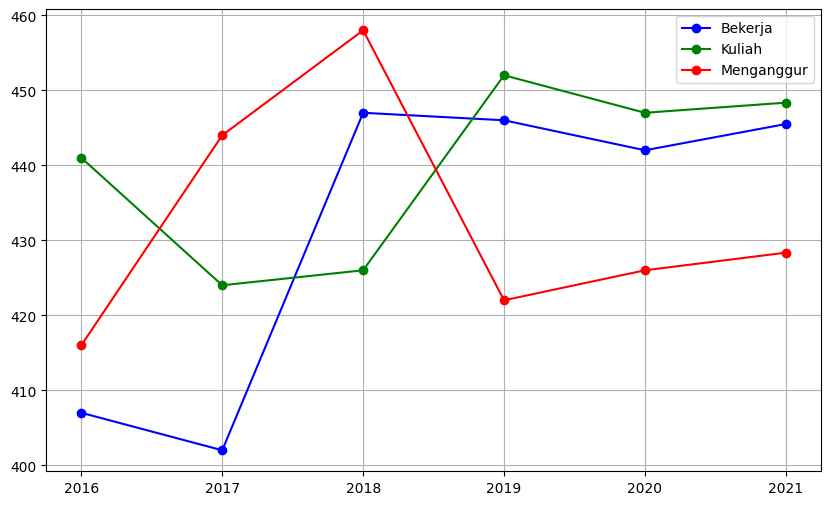

In [32]:
plt.figure(figsize=(10,6))
plt.plot(new_df['tahun'], new_df['bekerja'], marker='o', label='Bekerja', color='b')
plt.plot(new_df['tahun'], new_df['kuliah'], marker='o', label='Kuliah', color='g')
plt.plot(new_df['tahun'], new_df['menganggur'], marker='o', label='Menganggur', color='r')

plt.legend()

plt.grid(True)

plt.show()